Bu çalışmada [antalya_kiralik_ev.csv](https://www.kaggle.com/antalyakiralyontem/antalya-kiralik-ev) verisi kullanılmıştır. Veri manipülasyonu, veri görselleştirme ve veri analizi yapmak için [pandas](https://pandas.pydata.org/) ve [seaborn](https://seaborn.pydata.org/) kütüphanelerini kullanılarak yapılmıştır.

## Kütüphaneleri Yükle ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Veri Setini Yükle ##

In [2]:
df=pd.read_csv("/kaggle/input/antalya-muratpaa-daire-kira-cretleri-2024-ocak/antalya_kiralik_ev.csv")

## Keşifsel Veri Analizi ##

In [3]:
df.head()

,Unnamed: 0,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,bina_yas,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,otopark,esya_durumu,site_icinde,aidat,depozito,sahibi
0,1,Bayındır Mh.,15000.0,90.0,80.0,2+1,21-25 arası,Giriş Katı,4.0,Klima,1.0,0,0,Açık Otopark,1,0,100,15000,0
1,2,Çaybaşı Mh.,29000.0,145.0,135.0,3+1,0,1,5.0,Kombi (Doğalgaz),1.0,1,1,Kapalı Otopark,0,1,1500,30000,0
2,3,Güzeloba Mh.,24750.0,145.0,130.0,3+1,11-15 arası,3,4.0,Klima,1.0,1,0,Açık Otopark,0,0,500,25000,1
3,4,Şirinyalı Mh.,30000.0,230.0,200.0,3+1,5-10 arası,2,3.0,Doğalgaz Sobası,2.0,0,0,Açık Otopark,1,0,0,30000,0
4,5,Çağlayan Mh.,37500.0,320.0,300.0,4+2,16-20 arası,8,8.0,Klima,3.0,1,1,Açık Otopark,0,1,0,37500,0


## Unnamed: 0 Kolonunu Sil ##

In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mahalle                 750 non-null    object 
 1   fiyat                   750 non-null    float64
 2   brut_alan_m2            750 non-null    float64
 3   net_alan_m2             750 non-null    float64
 4   oda_sayisi              750 non-null    object 
 5   bina_yas                750 non-null    object 
 6   dairenin_bulundugu_kat  750 non-null    object 
 7   bina_kat_sayisi         750 non-null    float64
 8   isitma_turu             750 non-null    object 
 9   banyo_sayisi            750 non-null    float64
 10  balkon                  750 non-null    int64  
 11  asansor                 750 non-null    int64  
 12  otopark                 750 non-null    object 
 13  esya_durumu             750 non-null    int64  
 14  site_icinde             750 non-null    in

## Veri Görselleştirme ##

In [6]:
df['mahalle'].value_counts(normalize=True)

mahalle
Güzeloba Mh.        0.217333
Çağlayan Mh.        0.086667
Fener Mah.          0.056000
Şirinyalı Mh.       0.054667
Kızılarık Mh.       0.046667
Meydankavağı Mh.    0.033333
Yeşilbahçe Mh.      0.030667
Bayındır Mh.        0.029333
Gençlik Mh.         0.022667
Gebizli Mah.        0.022667
Yüksekalan Mh.      0.022667
Konuksever Mah.     0.022667
Yenigün Mh.         0.020000
Muratpaşa Mh.       0.018667
Kızıltoprak Mh.     0.017333
Kışla Mh.           0.017333
Varlık Mh.          0.017333
Bahçelievler Mh.    0.016000
Soğuksu Mh.         0.016000
Deniz Mah.          0.016000
Üçgen Mh.           0.016000
Altındağ Mh.        0.014667
Sinan Mah.          0.014667
Etiler Mah.         0.013333
Sedir Mah.          0.012000
Çaybaşı Mh.         0.010667
Güvenlik Mh.        0.010667
Meltem Mah.         0.010667
Haşimişcan Mh.      0.009333
Zerdalilik Mah.     0.009333
Dutlubahçe Mh.      0.008000
Kızılsaray Mh.      0.008000
Güzelbağ Mh.        0.008000
Yeşildere Mh.       0.006667
Güzelo

## Fiyat Görselleştirme ##

In [7]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

<Axes: ylabel='Frequency'>

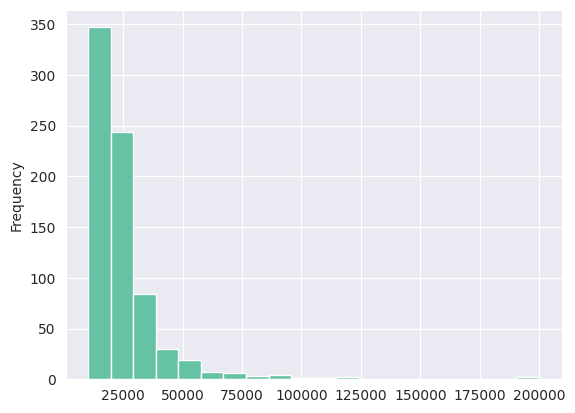

In [8]:
df['fiyat'].plot.hist(bins=20)

<Axes: xlabel='mahalle'>

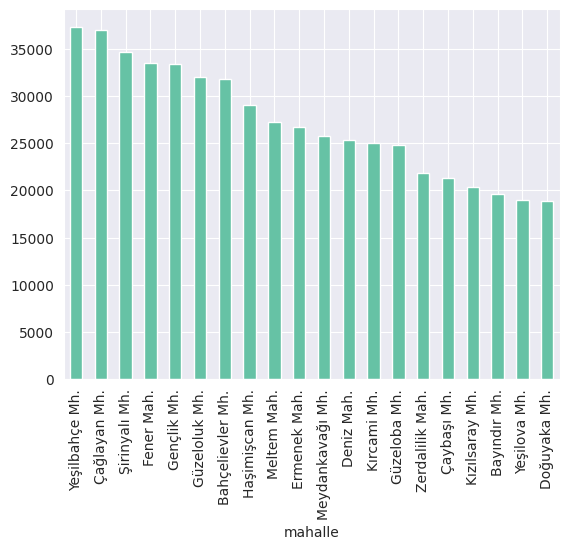

In [9]:
#mahallere göre ortalama fiyat (en pahalı 20 mahalle)
en_pahali_20_mahalle = df.groupby("mahalle")["fiyat"].mean().sort_values(ascending=False).head(20)
en_pahali_20_mahalle.plot.bar(x="mahalle", y="fiyat")

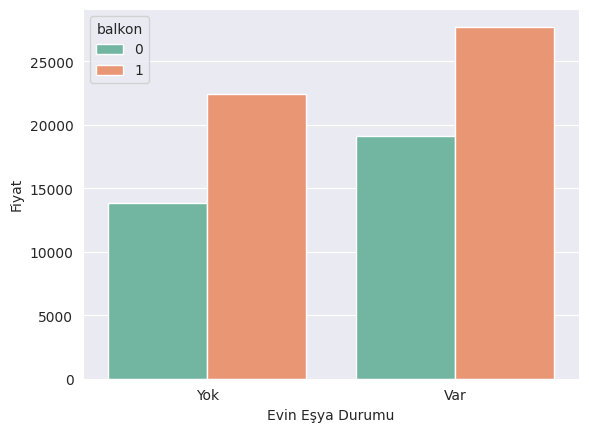

In [10]:
#eşya durumu ve balkona göre ortalama fiyat
sns.barplot(x="esya_durumu", y="fiyat", data=df, ci=None, hue="balkon");
plt.xlabel("Evin Eşya Durumu");
plt.xticks([0, 1], ["Yok", "Var"]);
plt.ylabel("Fiyat");

Text(0.5, 0, 'Bina Yası')

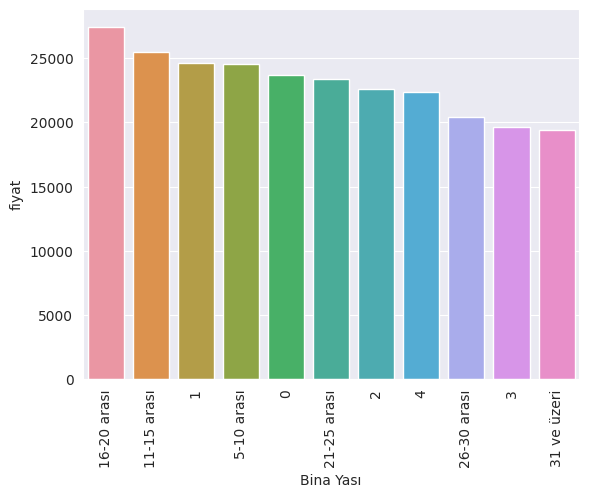

In [11]:
# bina yasına göre ortalama fiyat
sns.barplot(x="bina_yas", y="fiyat", data=df, ci=None, order=df.groupby("bina_yas")["fiyat"].mean().sort_values(ascending=False).index);
plt.xticks(rotation=90);
plt.xlabel("Bina Yası")

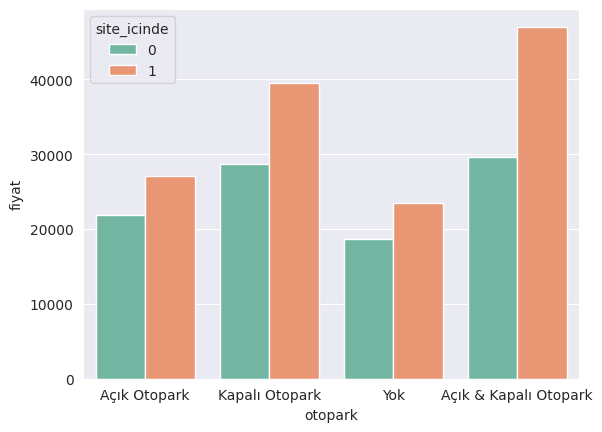

In [12]:
#otopark ve site durumuna göre ortalama fiyat
sns.barplot(x="otopark", y="fiyat", data=df, ci=None, hue="site_icinde");

<Axes: xlabel='fiyat', ylabel='aidat'>

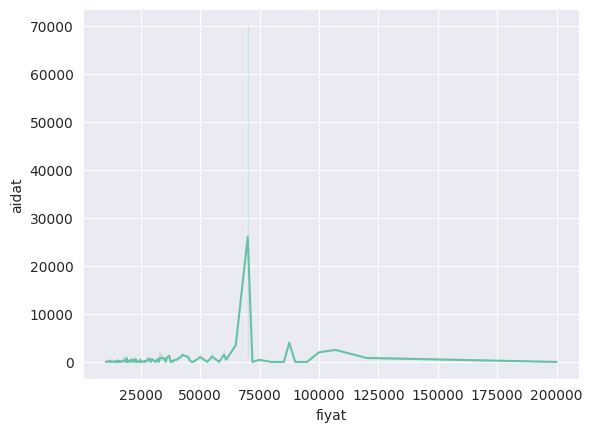

In [13]:
# aidat ve fiyatın ilişkilsel gösterimi
sns.lineplot(x="fiyat", y="aidat", data=df, )

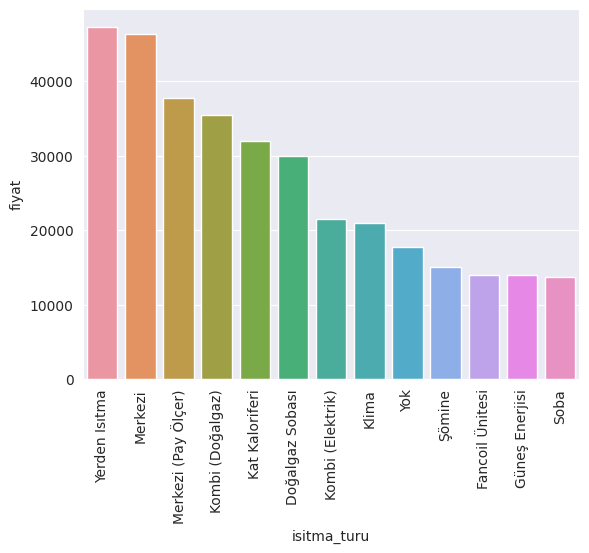

In [14]:
# ısıtma türü  durumuna göre ortalama fiyat
sns.barplot(x="isitma_turu", y="fiyat", data=df, ci=None, order=df.groupby("isitma_turu")["fiyat"].mean().sort_values(ascending=False).index);
plt.xticks(rotation=90);

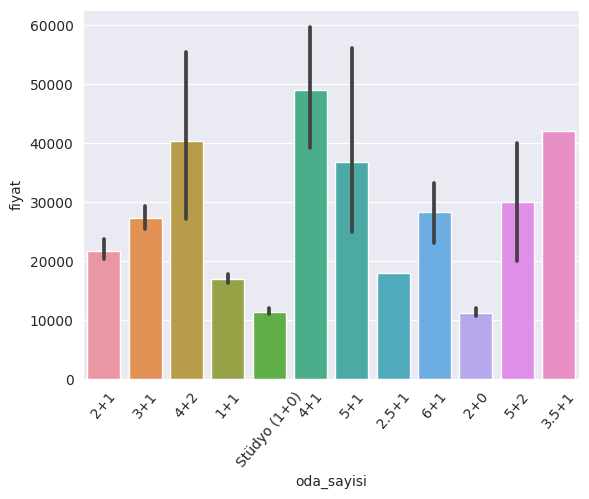

In [15]:
# oda sayısına göre ortalama fiyat
sns.barplot(x="oda_sayisi", y="fiyat", data=df);
plt.xticks(rotation=50);

<Axes: >

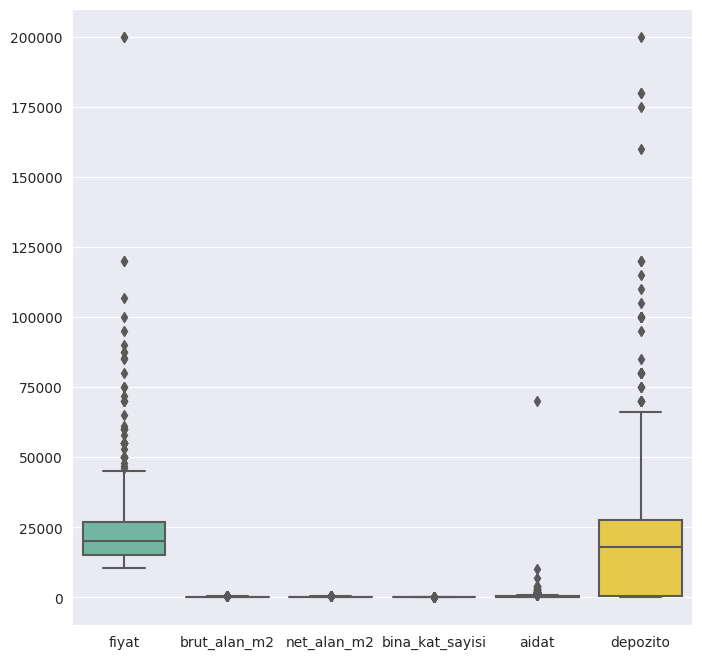

In [16]:
df_cols = df[['fiyat', 'brut_alan_m2', 'net_alan_m2', 'bina_kat_sayisi','aidat','depozito']]
plt.figure(figsize=(8, 8))
sns.boxplot(data=df_cols)

## Betimsel İstatistikler ##

In [17]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mahalle,750,50,Güzeloba Mh.,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiyat,750.0,NaN,NaN,NaN,24260.117333,16680.292541,10250.0,15000.0,20000.0,27000.0,200000.0
brut_alan_m2,750.0,NaN,NaN,NaN,123.754667,53.26392,25.0,85.0,115.0,150.0,400.0
net_alan_m2,750.0,NaN,NaN,NaN,111.505333,48.517233,20.0,75.0,100.0,140.0,370.0
oda_sayisi,750,12,2+1,279,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bina_yas,750,11,5-10 arası,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dairenin_bulundugu_kat,750,22,2,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bina_kat_sayisi,750.0,NaN,NaN,NaN,5.204,2.959853,1.0,3.0,4.0,7.0,17.0
isitma_turu,750,13,Klima,499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
banyo_sayisi,750.0,NaN,NaN,NaN,1.28,0.52086,1.0,1.0,1.0,1.0,4.0


## Eksik Veri Kontrolü ##

In [18]:
df.isnull().sum()

mahalle                   0
fiyat                     0
brut_alan_m2              0
net_alan_m2               0
oda_sayisi                0
bina_yas                  0
dairenin_bulundugu_kat    0
bina_kat_sayisi           0
isitma_turu               0
banyo_sayisi              0
balkon                    0
asansor                   0
otopark                   0
esya_durumu               0
site_icinde               0
aidat                     0
depozito                  0
sahibi                    0
dtype: int64

<Axes: xlabel='isitma_turu'>

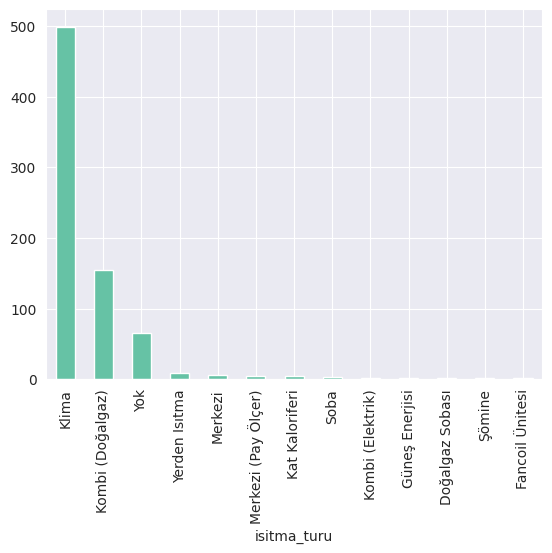

In [19]:
df['isitma_turu'].value_counts().plot.bar()

In [20]:
corr = df.corr(numeric_only=True)

<Axes: >

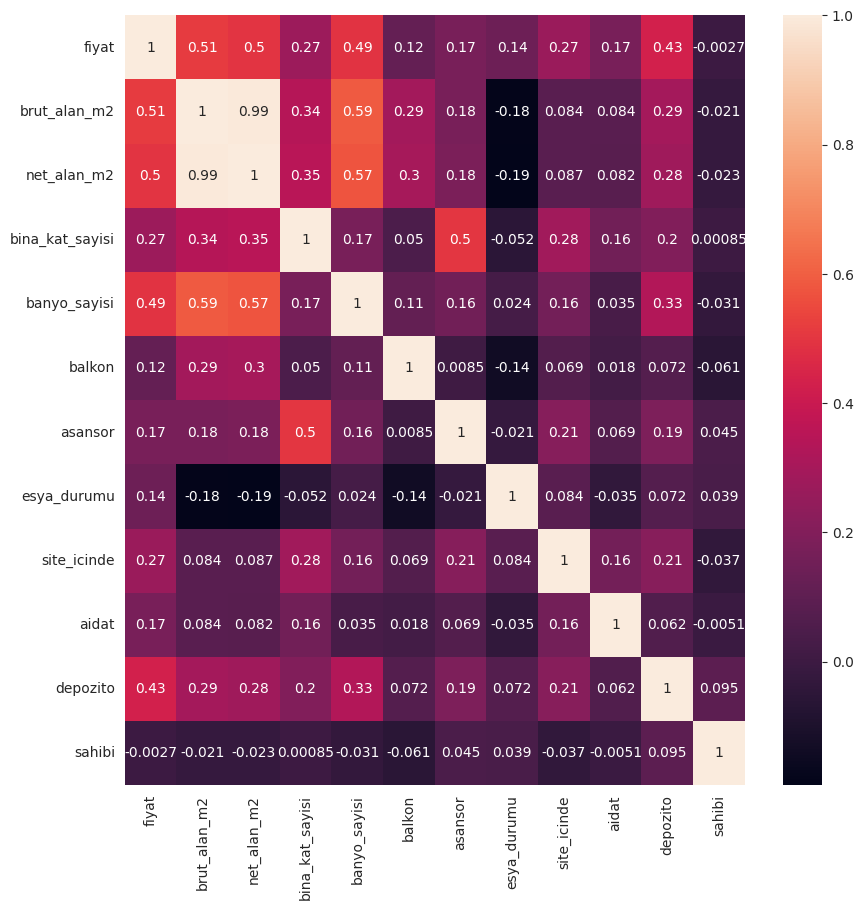

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)

## Veri Ön İşleme

In [22]:
df_cols = df[['fiyat', 'brut_alan_m2', 'net_alan_m2', 'bina_kat_sayisi','aidat','depozito']]
outliers = df_cols.quantile(0.99)
outliers

fiyat               88775.0
brut_alan_m2          300.0
net_alan_m2           260.2
bina_kat_sayisi        15.0
aidat                3255.0
depozito           117550.0
Name: 0.99, dtype: float64

In [23]:
df.describe()

,fiyat,brut_alan_m2,net_alan_m2,bina_kat_sayisi,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,aidat,depozito,sahibi
count,750.000000,750.000000,750.000000,750.000000,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,24260.117333,123.754667,111.505333,5.204000,1.28000,0.917333,0.626667,0.482667,0.281333,419.381333,21955.133333,0.088000
std,16680.292541,53.263920,48.517233,2.959853,0.52086,0.275561,0.484012,0.500033,0.449950,2644.590077,24414.825180,0.283484
min,10250.000000,25.000000,20.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15000.000000,85.000000,75.000000,3.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000
50%,20000.000000,115.000000,100.000000,4.000000,1.00000,1.000000,1.000000,0.000000,0.000000,50.000000,18000.000000,0.000000
75%,27000.000000,150.000000,140.000000,7.000000,1.00000,1.000000,1.000000,1.000000,1.000000,300.000000,27375.000000,0.000000
max,200000.000000,400.000000,370.000000,17.000000,4.00000,1.000000,1.000000,1.000000,1.000000,70000.000000,200000.000000,1.000000


In [24]:
df_non_outliers = df[(df['fiyat'] <= outliers['fiyat']) & (df['brut_alan_m2'] < outliers['brut_alan_m2']) & (df['net_alan_m2'] < outliers['net_alan_m2']) & (df['bina_kat_sayisi'] < outliers['bina_kat_sayisi']) & (df['aidat'] < outliers['aidat']) & (df['depozito'] < outliers['depozito'])]
df_non_outliers

,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,bina_yas,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,otopark,esya_durumu,site_icinde,aidat,depozito,sahibi
0,Bayındır Mh.,15000.0,90.0,80.0,2+1,21-25 arası,Giriş Katı,4.0,Klima,1.0,0,0,Açık Otopark,1,0,100,15000,0
1,Çaybaşı Mh.,29000.0,145.0,135.0,3+1,0,1,5.0,Kombi (Doğalgaz),1.0,1,1,Kapalı Otopark,0,1,1500,30000,0
2,Güzeloba Mh.,24750.0,145.0,130.0,3+1,11-15 arası,3,4.0,Klima,1.0,1,0,Açık Otopark,0,0,500,25000,1
3,Şirinyalı Mh.,30000.0,230.0,200.0,3+1,5-10 arası,2,3.0,Doğalgaz Sobası,2.0,0,0,Açık Otopark,1,0,0,30000,0
5,Kızılsaray Mh.,25000.0,140.0,130.0,3+1,26-30 arası,Giriş Altı Kot 2,10.0,Klima,1.0,1,1,Yok,1,0,0,50000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,Yenigün Mh.,16000.0,115.0,110.0,2+1,11-15 arası,2,5.0,Klima,1.0,1,1,Açık Otopark,0,0,150,16000,0
745,Güzeloba Mh.,16000.0,120.0,110.0,2+1,16-20 arası,2,3.0,Klima,1.0,1,1,Açık Otopark,0,0,250,16000,0
747,Şirinyalı Mh.,30000.0,220.0,200.0,5+1,11-15 arası,12,13.0,Klima,2.0,1,1,Açık Otopark,0,0,0,30000,0
748,Muratpaşa Mh.,20000.0,70.0,65.0,2+1,5-10 arası,Çatı Katı,5.0,Kombi (Doğalgaz),1.0,1,1,Açık Otopark,1,0,500,20000,1


<Axes: >

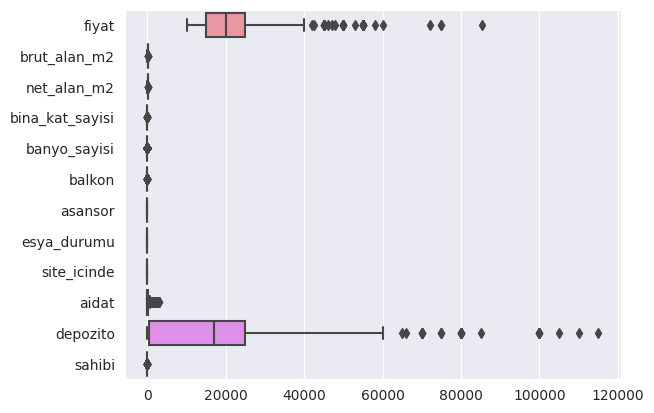

In [25]:
sns.boxplot(data=df_non_outliers, orient="h")

In [26]:
df_non_outliers.describe()

,fiyat,brut_alan_m2,net_alan_m2,bina_kat_sayisi,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,aidat,depozito,sahibi
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,22154.184874,119.308123,107.687675,4.966387,1.243697,0.914566,0.616246,0.477591,0.259104,264.525210,20099.929972,0.088235
std,10052.946171,46.062008,42.772423,2.597116,0.473115,0.279723,0.486640,0.499848,0.438450,481.571047,19113.045357,0.283836
min,10250.000000,25.000000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15000.000000,85.000000,75.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000
50%,20000.000000,115.000000,100.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,50.000000,17000.000000,0.000000
75%,25000.000000,150.000000,135.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,250.000000,25000.000000,0.000000
max,85250.000000,280.000000,250.000000,14.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3000.000000,115000.000000,1.000000


In [27]:
df_non_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 749
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mahalle                 714 non-null    object 
 1   fiyat                   714 non-null    float64
 2   brut_alan_m2            714 non-null    float64
 3   net_alan_m2             714 non-null    float64
 4   oda_sayisi              714 non-null    object 
 5   bina_yas                714 non-null    object 
 6   dairenin_bulundugu_kat  714 non-null    object 
 7   bina_kat_sayisi         714 non-null    float64
 8   isitma_turu             714 non-null    object 
 9   banyo_sayisi            714 non-null    float64
 10  balkon                  714 non-null    int64  
 11  asansor                 714 non-null    int64  
 12  otopark                 714 non-null    object 
 13  esya_durumu             714 non-null    int64  
 14  site_icinde             714 non-null    int64  

In [28]:
df["oda_sayisi"].value_counts()

oda_sayisi
2+1             279
3+1             272
1+1             140
4+1              31
5+1               8
4+2               5
6+1               4
2+0               4
Stüdyo (1+0)      3
5+2               2
2.5+1             1
3.5+1             1
Name: count, dtype: int64

In [29]:
df_non_outliers["oda_sayisi"].unique()

array(['2+1', '3+1', '1+1', 'Stüdyo (1+0)', '4+1', '5+1', '4+2', '2.5+1',
       '6+1', '2+0', '3.5+1', '5+2'], dtype=object)

In [30]:
oda_sayisi_replaced = {
    "Stüdyo (1+0)":1,
    "2+0":2,
    "1+1":2,
    "2+1":3,
    "3+1":4,
    "4+1":5,
    "4+2":6,
    "5+1":6,
    "6+1":7,
    "5+2":7,
    "2.5+1":3.5,
    "3.5+1":4.5
}

In [31]:
df_non_outliers["oda_sayisi"] = df_non_outliers["oda_sayisi"].map(oda_sayisi_replaced)

In [32]:
df_non_outliers["oda_sayisi"].value_counts()

oda_sayisi
3.0    272
4.0    260
2.0    141
5.0     23
6.0      8
7.0      5
1.0      3
3.5      1
4.5      1
Name: count, dtype: int64

In [33]:
df_non_outliers["oda_sayisi"] = df_non_outliers["oda_sayisi"].astype("float")

<Axes: xlabel='oda_sayisi', ylabel='count'>

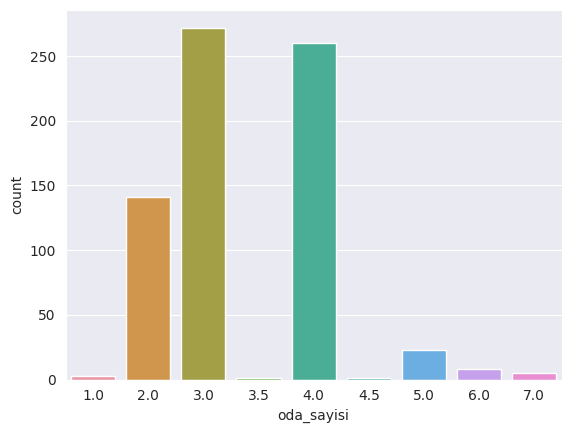

In [34]:
sns.countplot(x="oda_sayisi", data=df_non_outliers)

In [35]:
df_non_outliers.head()

,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,bina_yas,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,otopark,esya_durumu,site_icinde,aidat,depozito,sahibi
0,Bayındır Mh.,15000.0,90.0,80.0,3.0,21-25 arası,Giriş Katı,4.0,Klima,1.0,0,0,Açık Otopark,1,0,100,15000,0
1,Çaybaşı Mh.,29000.0,145.0,135.0,4.0,0,1,5.0,Kombi (Doğalgaz),1.0,1,1,Kapalı Otopark,0,1,1500,30000,0
2,Güzeloba Mh.,24750.0,145.0,130.0,4.0,11-15 arası,3,4.0,Klima,1.0,1,0,Açık Otopark,0,0,500,25000,1
3,Şirinyalı Mh.,30000.0,230.0,200.0,4.0,5-10 arası,2,3.0,Doğalgaz Sobası,2.0,0,0,Açık Otopark,1,0,0,30000,0
5,Kızılsaray Mh.,25000.0,140.0,130.0,4.0,26-30 arası,Giriş Altı Kot 2,10.0,Klima,1.0,1,1,Yok,1,0,0,50000,1


In [36]:
#object verileri unique göster
df_non_outliers.select_dtypes(include="object").nunique()

mahalle                   50
bina_yas                  11
dairenin_bulundugu_kat    21
isitma_turu               13
otopark                    4
dtype: int64

In [37]:
df_non_outliers["bina_yas"].unique()

array(['21-25 arası', '0', '11-15 arası', '5-10 arası', '26-30 arası',
       '31 ve üzeri', '1', '16-20 arası', '4', '3', '2'], dtype=object)

In [38]:
df_bina_yas_replaced = {
    "5-10 arası":7,
    "11-15 arası":13,
    "16-20 arası":18,
    "21-25 arası":23,
    "26-30 arası":28,
    "31 ve üzeri":32,
    "0":0,
    "1":1,
    "2":2,
    "3":3,
    "4":4
}

In [39]:
df_non_outliers["bina_yas"] = df_non_outliers["bina_yas"].map(df_bina_yas_replaced)

In [40]:
df_non_outliers["bina_yas"].unique()

array([23,  0, 13,  7, 28, 32,  1, 18,  4,  3,  2])

In [41]:
df_non_outliers["bina_yas"] = df_non_outliers["bina_yas"].astype("int")

In [42]:
#mahalleyi target encoder ile dönüştürme
from category_encoders import TargetEncoder
te = TargetEncoder()
df_non_outliers["mahalle"] = te.fit_transform(df_non_outliers["mahalle"], df_non_outliers["fiyat"])

In [43]:
df_non_outliers["mahalle"].unique()

array([20757.30493116, 21959.35568553, 23526.89734001, 31098.15950062,
       21810.47577863, 22090.41589037, 16802.49487508, 24417.33192568,
       20165.48252707, 23739.18286518, 21407.30105376, 20187.12355919,
       19309.93030976, 19821.6266905 , 29101.12953924, 20169.6164054 ,
       27162.1177746 , 19985.81572423, 21043.77772012, 18671.59408497,
       21603.34210338, 23627.96773711, 23099.30585791, 20339.75062182,
       25789.59243697, 21019.1089648 , 23146.26088962, 20342.46802777,
       20821.39522142, 24177.64258158, 20155.8064055 , 21547.17794267,
       20091.73186641, 21357.14718991, 20538.95556044, 21018.25370259,
       23959.43413181, 20375.35659275, 21519.35129595, 21288.37657551,
       20868.42253834, 20776.10874139, 22928.29709064, 21158.31055751,
       20660.60878705, 21223.36479469, 21483.58174342, 20721.43862533,
       22524.44953832, 21743.79869214])

## Model Oluşturma

In [44]:
y = df_non_outliers["fiyat"]
X = df_non_outliers.drop("fiyat", axis=1)


In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 749
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mahalle                 714 non-null    float64
 1   brut_alan_m2            714 non-null    float64
 2   net_alan_m2             714 non-null    float64
 3   oda_sayisi              714 non-null    float64
 4   bina_yas                714 non-null    int64  
 5   dairenin_bulundugu_kat  714 non-null    object 
 6   bina_kat_sayisi         714 non-null    float64
 7   isitma_turu             714 non-null    object 
 8   banyo_sayisi            714 non-null    float64
 9   balkon                  714 non-null    int64  
 10  asansor                 714 non-null    int64  
 11  otopark                 714 non-null    object 
 12  esya_durumu             714 non-null    int64  
 13  site_icinde             714 non-null    int64  
 14  aidat                   714 non-null    int64  

In [46]:
# kategorik verileri dönüştürme 
X = pd.get_dummies(X, columns=["dairenin_bulundugu_kat","isitma_turu","otopark"], drop_first=True)

In [47]:
#scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
import sys
sys.path.append("/kaggle/input/all-reg-models")
from all_reg_models import *

In [50]:
all_reg_models(X_train, X_test, y_train, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 292
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 28
[LightGBM] [Info] Start training from score 22449.103327
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [51]:
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
print("R2 score:", r2_score(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 292
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 28
[LightGBM] [Info] Start training from score 22449.103327
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [52]:
# test ile pred i karşılatşıran df 
df_test_pred = pd.DataFrame({"Gerçek fiyat": y_test, "Tahmin edilen fiyat": y_pred})
df_test_pred.head(10)

,Gerçek fiyat,Tahmin edilen fiyat
126,18000.0,18067.023007
347,26500.0,32661.013281
42,30000.0,28725.769117
312,25000.0,24820.314038
686,26000.0,25694.291467
457,13000.0,15660.864675
69,20000.0,25237.915259
647,11000.0,13833.991291
83,25000.0,26537.536358
683,45000.0,39049.889890


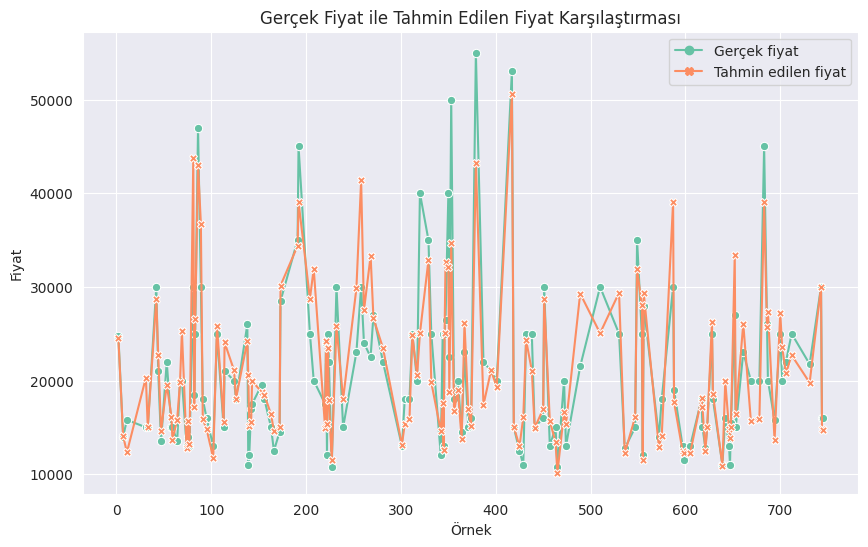

In [53]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_test_pred, markers=True, dashes=False)
plt.xlabel('Örnek')
plt.ylabel('Fiyat')
plt.title('Gerçek Fiyat ile Tahmin Edilen Fiyat Karşılaştırması')
plt.grid(True)
plt.show()

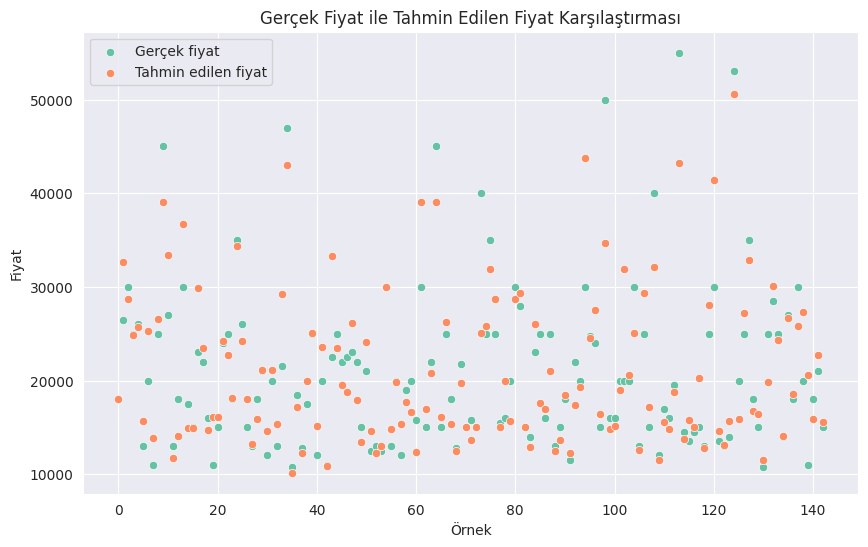

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(df_test_pred)), y=df_test_pred['Gerçek fiyat'], label='Gerçek fiyat')
sns.scatterplot(x=range(len(df_test_pred)), y=df_test_pred['Tahmin edilen fiyat'], label='Tahmin edilen fiyat')
plt.xlabel('Örnek')
plt.ylabel('Fiyat')
plt.title('Gerçek Fiyat ile Tahmin Edilen Fiyat Karşılaştırması')
plt.legend()
plt.grid(True)
plt.show()